# YOLOv8 Object Detection on Custom Dataset

In [26]:
# !pip install ultralytics  # Uncomment if not already installed

In [27]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [28]:
# Load YOLOv8 model
model = YOLO("yolov8s.pt")  # Use yolov8s.pt / m.pt / l.pt for better accuracy
model.to("cpu")


100%|██████████| 21.5M/21.5M [00:00<00:00, 35.9MB/s]


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [29]:
# Dataset paths
train_path = '../dataset_organized/train/'
test_path = '../dataset_organized/test/'
val_path = '../dataset_organized/validation/'

In [30]:
categories = sorted(os.listdir(test_path))  # ['cardboard', 'glass', ..., 'trash']


In [31]:
# Helper to collect image paths
def load_image_paths(path):
    image_paths = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        for file in os.listdir(folder_path):
            image_paths.append(os.path.join(folder_path, file))
    return image_paths

In [32]:
# Load test image paths
test_image_paths = load_image_paths(test_path)

Processing cardboard:   0%|          | 0/10 [00:00<?, ?it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/cardboard/cardboard222.jpg: 480x640 (no detections), 293.8ms
Speed: 1.6ms preprocess, 293.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing cardboard:  10%|█         | 1/10 [00:00<00:04,  2.13it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/cardboard/cardboard98.jpg: 480x640 (no detections), 283.8ms
Speed: 1.6ms preprocess, 283.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing cardboard:  20%|██        | 2/10 [00:00<00:02,  2.75it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/cardboard/cardboard210.jpg: 480x640 (no detections), 295.3ms
Speed: 1.6ms preprocess, 295.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing cardboard:  30%|███       | 3/10 [00:01<00:02,  2.98it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/cardboard/cardboard69.jpg: 480x640 (no detections), 279.9ms
Speed: 2.0ms preprocess, 279.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing cardboard:  40%|████      | 4/10 [00:01<00:01,  3.16it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/cardboard/cardboard363.jpg: 480x640 1 book, 282.5ms
Speed: 1.7ms preprocess, 282.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing cardboard:  50%|█████     | 5/10 [00:01<00:01,  3.26it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/cardboard/cardboard34.jpg: 480x640 (no detections), 278.1ms
Speed: 1.6ms preprocess, 278.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing cardboard:  60%|██████    | 6/10 [00:01<00:01,  3.34it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/cardboard/cardboard71.jpg: 480x640 (no detections), 294.2ms
Speed: 1.8ms preprocess, 294.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing cardboard:  70%|███████   | 7/10 [00:02<00:00,  3.33it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/cardboard/cardboard261.jpg: 480x640 1 clock, 279.6ms
Speed: 1.6ms preprocess, 279.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing cardboard:  80%|████████  | 8/10 [00:02<00:00,  3.38it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/cardboard/cardboard40.jpg: 480x640 1 knife, 296.5ms
Speed: 1.8ms preprocess, 296.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing cardboard:  90%|█████████ | 9/10 [00:02<00:00,  3.35it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/cardboard/cardboard31.jpg: 480x640 (no detections), 291.0ms
Speed: 1.7ms preprocess, 291.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing cardboard: 100%|██████████| 10/10 [00:03<00:00,  3.21it/s]


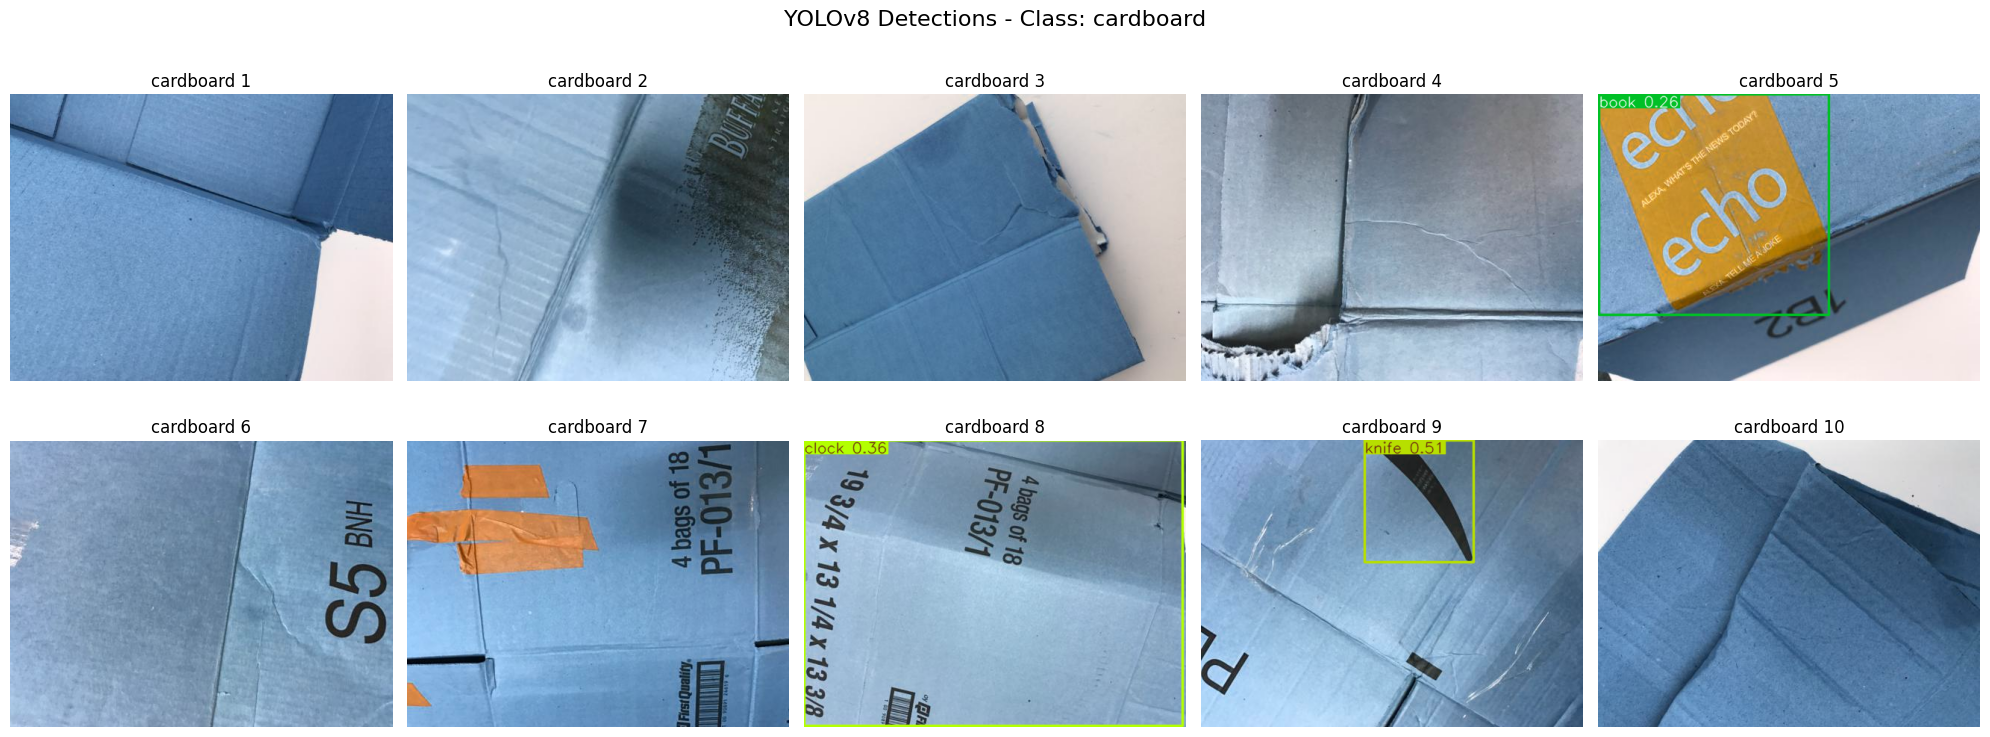

Processing glass:   0%|          | 0/10 [00:00<?, ?it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/glass/glass267.jpg: 480x640 1 snowboard, 282.4ms
Speed: 1.9ms preprocess, 282.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing glass:  10%|█         | 1/10 [00:00<00:02,  3.45it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/glass/glass68.jpg: 480x640 (no detections), 298.1ms
Speed: 2.0ms preprocess, 298.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing glass:  20%|██        | 2/10 [00:00<00:02,  3.34it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/glass/glass429.jpg: 480x640 1 bus, 312.9ms
Speed: 1.7ms preprocess, 312.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing glass:  30%|███       | 3/10 [00:00<00:02,  3.24it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/glass/glass451.jpg: 480x640 (no detections), 292.4ms
Speed: 1.8ms preprocess, 292.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing glass:  40%|████      | 4/10 [00:01<00:01,  3.28it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/glass/glass385.jpg: 480x640 1 bottle, 279.1ms
Speed: 2.1ms preprocess, 279.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing glass:  50%|█████     | 5/10 [00:01<00:01,  3.35it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/glass/glass297.jpg: 480x640 1 cup, 278.1ms
Speed: 1.7ms preprocess, 278.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing glass:  60%|██████    | 6/10 [00:01<00:01,  3.40it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/glass/glass35.jpg: 480x640 (no detections), 277.5ms
Speed: 1.6ms preprocess, 277.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing glass:  70%|███████   | 7/10 [00:02<00:00,  3.44it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/glass/glass193.jpg: 480x640 1 kite, 289.3ms
Speed: 1.6ms preprocess, 289.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing glass:  80%|████████  | 8/10 [00:02<00:00,  3.42it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/glass/glass159.jpg: 480x640 1 bottle, 275.8ms
Speed: 1.6ms preprocess, 275.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing glass:  90%|█████████ | 9/10 [00:02<00:00,  3.45it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/glass/glass353.jpg: 480x640 1 bottle, 282.3ms
Speed: 1.5ms preprocess, 282.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing glass: 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]


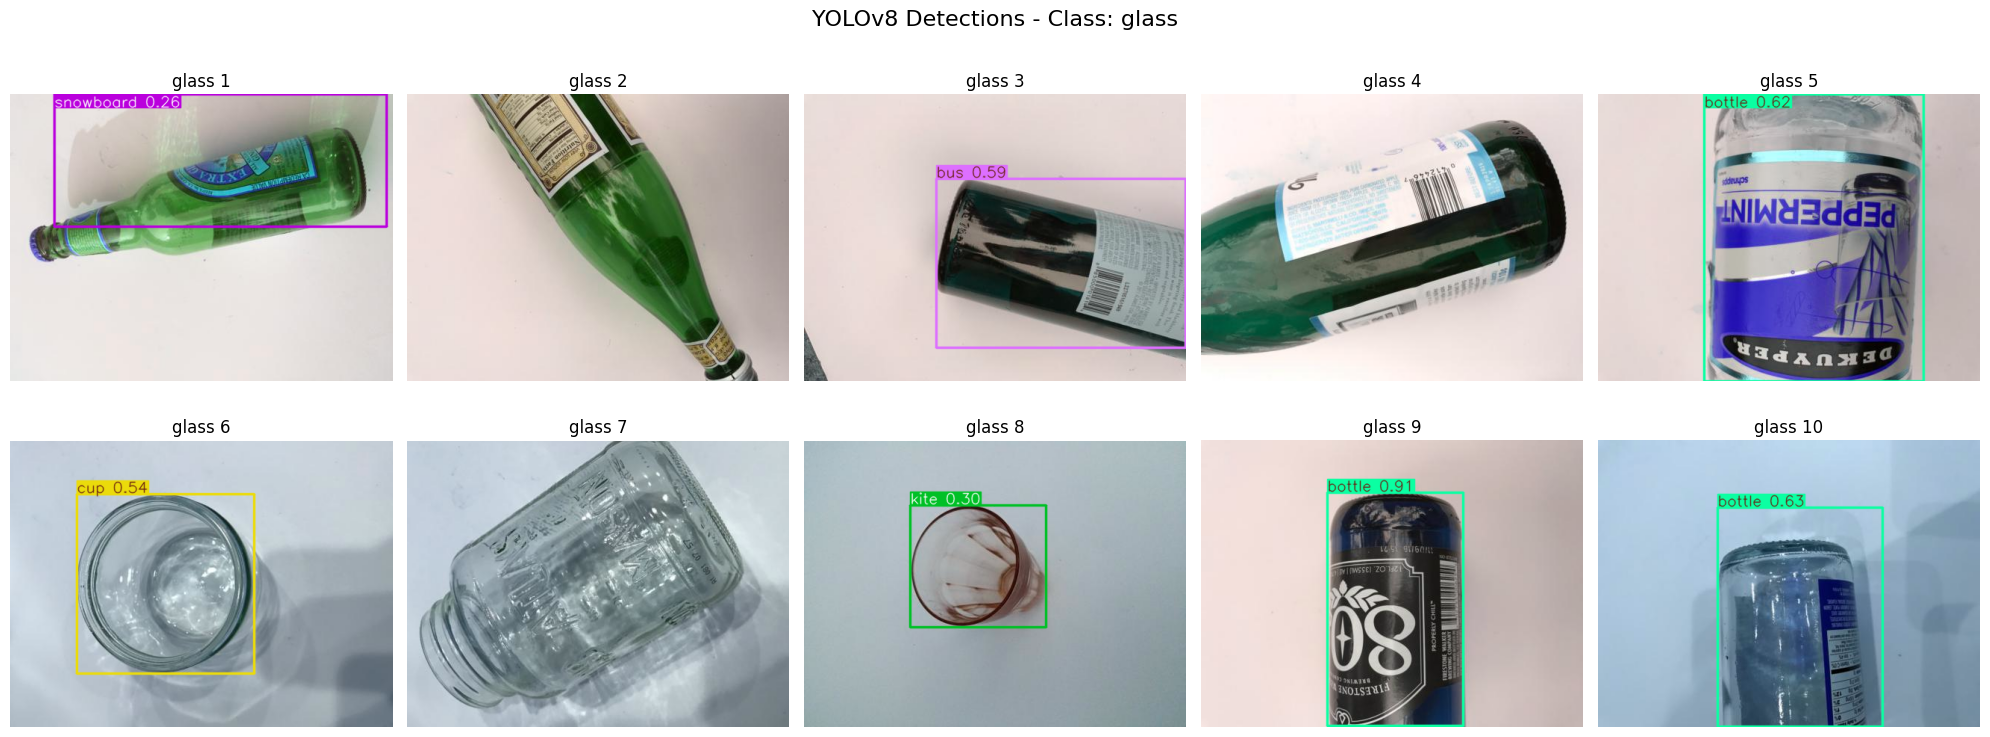

Processing metal:   0%|          | 0/10 [00:00<?, ?it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/metal/metal68.jpg: 480x640 (no detections), 290.3ms
Speed: 1.7ms preprocess, 290.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing metal:  10%|█         | 1/10 [00:00<00:02,  3.36it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/metal/metal27.jpg: 480x640 (no detections), 272.3ms
Speed: 1.7ms preprocess, 272.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing metal:  20%|██        | 2/10 [00:00<00:02,  3.48it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/metal/metal65.jpg: 480x640 1 frisbee, 1 toilet, 277.9ms
Speed: 2.3ms preprocess, 277.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing metal:  30%|███       | 3/10 [00:00<00:02,  3.49it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/metal/metal393.jpg: 480x640 1 cup, 289.4ms
Speed: 1.7ms preprocess, 289.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing metal:  40%|████      | 4/10 [00:01<00:01,  3.43it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/metal/metal341.jpg: 480x640 (no detections), 284.4ms
Speed: 1.8ms preprocess, 284.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing metal:  50%|█████     | 5/10 [00:01<00:01,  3.43it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/metal/metal161.jpg: 480x640 (no detections), 278.8ms
Speed: 1.9ms preprocess, 278.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing metal:  60%|██████    | 6/10 [00:01<00:01,  3.45it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/metal/metal146.jpg: 480x640 (no detections), 284.1ms
Speed: 1.7ms preprocess, 284.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing metal:  70%|███████   | 7/10 [00:02<00:00,  3.45it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/metal/metal325.jpg: 480x640 1 book, 282.9ms
Speed: 1.6ms preprocess, 282.9ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing metal:  80%|████████  | 8/10 [00:02<00:00,  3.45it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/metal/metal344.jpg: 480x640 1 cell phone, 279.8ms
Speed: 1.6ms preprocess, 279.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing metal:  90%|█████████ | 9/10 [00:02<00:00,  3.46it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/metal/metal143.jpg: 480x640 1 suitcase, 292.7ms
Speed: 1.8ms preprocess, 292.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing metal: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]


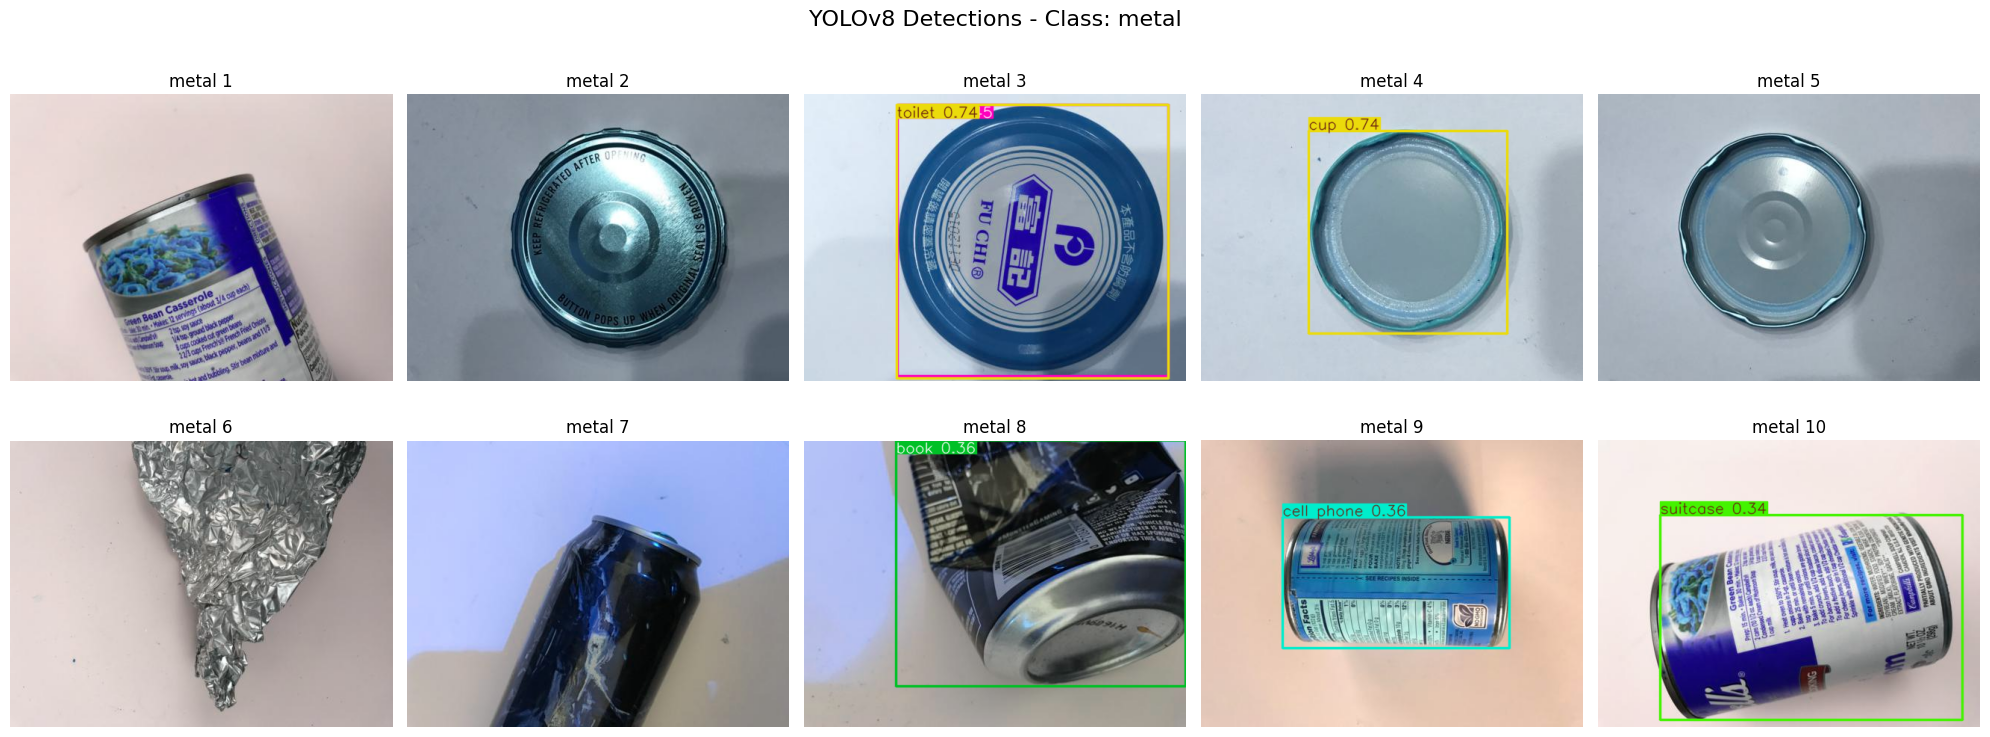

Processing paper:   0%|          | 0/10 [00:00<?, ?it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/paper/paper276.jpg: 480x640 (no detections), 293.4ms
Speed: 1.7ms preprocess, 293.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing paper:  10%|█         | 1/10 [00:00<00:02,  3.35it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/paper/paper120.jpg: 480x640 1 airplane, 279.3ms
Speed: 1.6ms preprocess, 279.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing paper:  20%|██        | 2/10 [00:00<00:02,  3.43it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/paper/paper124.jpg: 480x640 (no detections), 278.0ms
Speed: 1.5ms preprocess, 278.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing paper:  30%|███       | 3/10 [00:00<00:02,  3.47it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/paper/paper500.jpg: 480x640 2 books, 288.0ms
Speed: 1.8ms preprocess, 288.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing paper:  40%|████      | 4/10 [00:01<00:01,  3.44it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/paper/paper356.jpg: 480x640 1 person, 1 motorcycle, 272.7ms
Speed: 1.5ms preprocess, 272.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing paper:  50%|█████     | 5/10 [00:01<00:01,  3.49it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/paper/paper548.jpg: 480x640 (no detections), 274.9ms
Speed: 1.6ms preprocess, 274.9ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing paper:  60%|██████    | 6/10 [00:01<00:01,  3.51it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/paper/paper354.jpg: 480x640 (no detections), 289.0ms
Speed: 1.6ms preprocess, 289.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing paper:  70%|███████   | 7/10 [00:02<00:00,  3.47it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/paper/paper368.jpg: 480x640 1 toilet, 270.4ms
Speed: 1.7ms preprocess, 270.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing paper:  80%|████████  | 8/10 [00:02<00:00,  3.51it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/paper/paper169.jpg: 480x640 (no detections), 283.3ms
Speed: 1.5ms preprocess, 283.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing paper:  90%|█████████ | 9/10 [00:02<00:00,  3.49it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/paper/paper12.jpg: 480x640 (no detections), 279.2ms
Speed: 1.9ms preprocess, 279.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing paper: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]


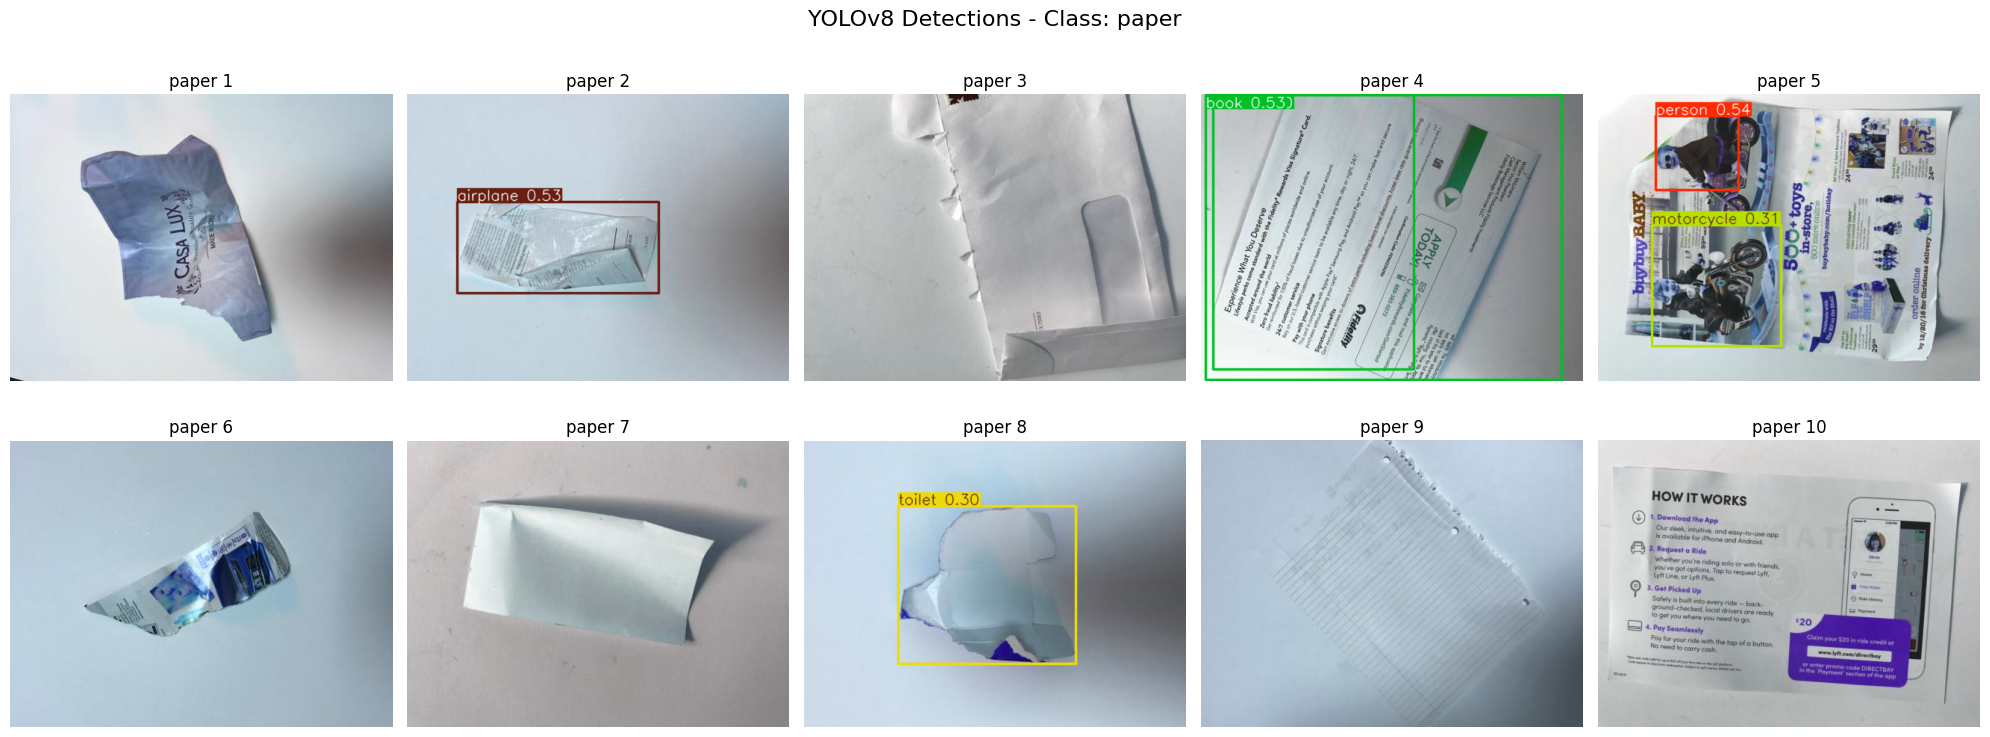

Processing plastic:   0%|          | 0/10 [00:00<?, ?it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/plastic/plastic49.jpg: 480x640 1 bus, 290.8ms
Speed: 1.8ms preprocess, 290.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing plastic:  10%|█         | 1/10 [00:00<00:02,  3.36it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/plastic/plastic434.jpg: 480x640 (no detections), 276.2ms
Speed: 1.7ms preprocess, 276.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing plastic:  20%|██        | 2/10 [00:00<00:02,  3.46it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/plastic/plastic226.jpg: 480x640 1 wine glass, 305.7ms
Speed: 1.5ms preprocess, 305.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing plastic:  30%|███       | 3/10 [00:00<00:02,  3.33it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/plastic/plastic227.jpg: 480x640 (no detections), 286.9ms
Speed: 2.6ms preprocess, 286.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing plastic:  40%|████      | 4/10 [00:01<00:01,  3.36it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/plastic/plastic372.jpg: 480x640 (no detections), 292.8ms
Speed: 1.6ms preprocess, 292.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing plastic:  50%|█████     | 5/10 [00:01<00:01,  3.35it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/plastic/plastic374.jpg: 480x640 (no detections), 272.1ms
Speed: 1.6ms preprocess, 272.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing plastic:  60%|██████    | 6/10 [00:01<00:01,  3.43it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/plastic/plastic125.jpg: 480x640 1 toothbrush, 292.3ms
Speed: 1.7ms preprocess, 292.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing plastic:  70%|███████   | 7/10 [00:02<00:00,  3.40it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/plastic/plastic93.jpg: 480x640 1 bottle, 269.5ms
Speed: 1.5ms preprocess, 269.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing plastic:  80%|████████  | 8/10 [00:02<00:00,  3.47it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/plastic/plastic411.jpg: 480x640 (no detections), 283.5ms
Speed: 1.6ms preprocess, 283.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing plastic:  90%|█████████ | 9/10 [00:02<00:00,  3.46it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/plastic/plastic177.jpg: 480x640 (no detections), 271.2ms
Speed: 1.5ms preprocess, 271.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing plastic: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]


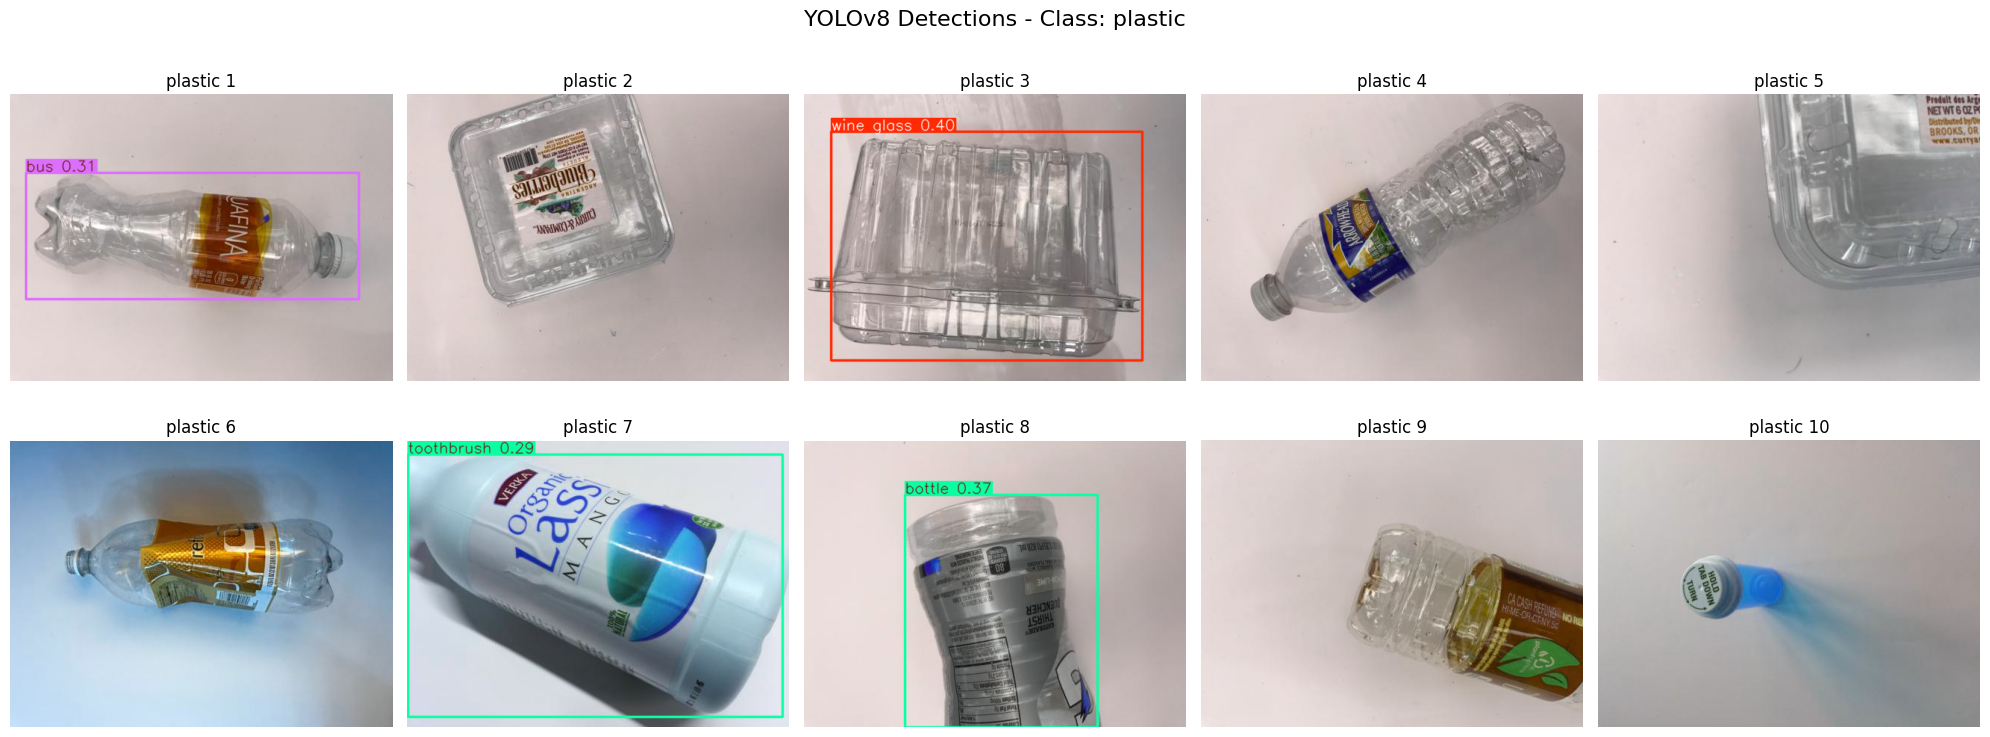

Processing trash:   0%|          | 0/10 [00:00<?, ?it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/trash/trash12.jpg: 480x640 (no detections), 298.0ms
Speed: 1.8ms preprocess, 298.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing trash:  10%|█         | 1/10 [00:00<00:02,  3.29it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/trash/trash70.jpg: 480x640 (no detections), 279.8ms
Speed: 2.2ms preprocess, 279.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing trash:  20%|██        | 2/10 [00:00<00:02,  3.40it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/trash/trash18.jpg: 480x640 (no detections), 310.4ms
Speed: 1.6ms preprocess, 310.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing trash:  30%|███       | 3/10 [00:00<00:02,  3.28it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/trash/trash8.jpg: 480x640 (no detections), 274.9ms
Speed: 1.7ms preprocess, 274.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing trash:  40%|████      | 4/10 [00:01<00:01,  3.39it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/trash/trash79.jpg: 480x640 (no detections), 290.7ms
Speed: 1.8ms preprocess, 290.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing trash:  50%|█████     | 5/10 [00:01<00:01,  3.38it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/trash/trash94.jpg: 480x640 1 kite, 288.4ms
Speed: 2.2ms preprocess, 288.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing trash:  60%|██████    | 6/10 [00:01<00:01,  3.38it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/trash/trash1.jpg: 480x640 (no detections), 292.3ms
Speed: 1.6ms preprocess, 292.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing trash:  70%|███████   | 7/10 [00:02<00:00,  3.37it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/trash/trash29.jpg: 480x640 1 cake, 288.0ms
Speed: 1.6ms preprocess, 288.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing trash:  80%|████████  | 8/10 [00:02<00:00,  3.38it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/trash/trash83.jpg: 480x640 1 kite, 287.4ms
Speed: 1.6ms preprocess, 287.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing trash:  90%|█████████ | 9/10 [00:02<00:00,  3.38it/s]


image 1/1 /home/alexandre/Documents/Projeto-CAA-1/YOLO/../dataset_organized/test/trash/trash45.jpg: 480x640 1 scissors, 280.7ms
Speed: 2.7ms preprocess, 280.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing trash: 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]


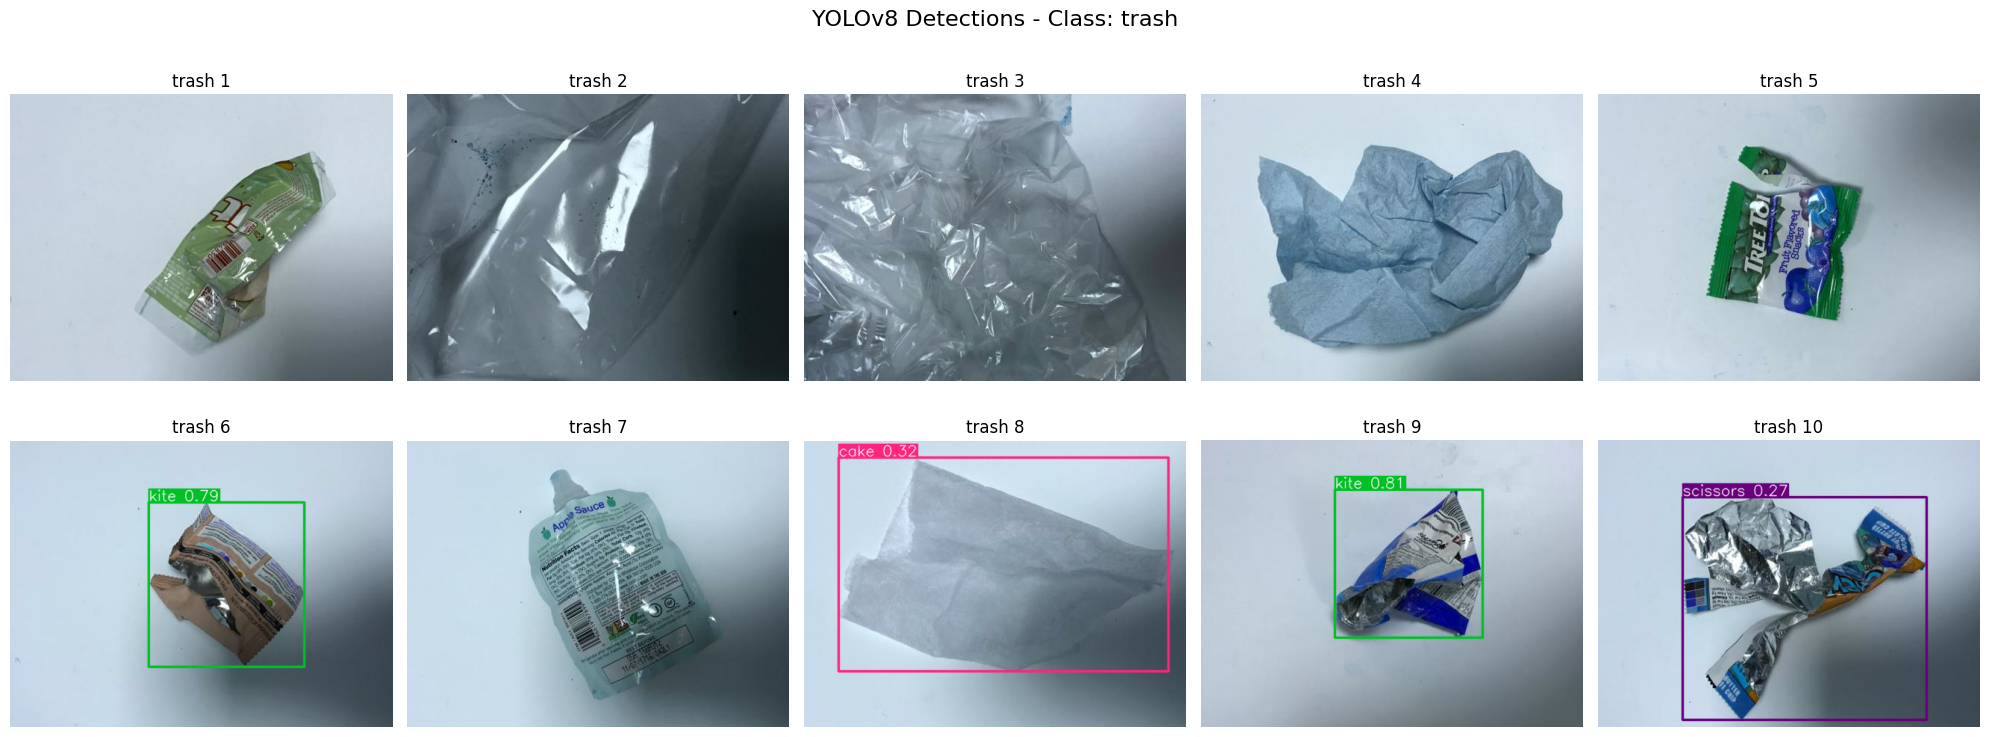

In [33]:

for category in categories:
    class_path = os.path.join(test_path, category)
    image_files = os.listdir(class_path)[:10]  # Take first 10 images
    image_paths = [os.path.join(class_path, img) for img in image_files]

    rendered_images = []

    for path in tqdm(image_paths, desc=f"Processing {category}"):
        result = model(path)[0]
        rendered = result.plot()
        rendered_images.append(rendered)

    # Display 10 images (2 rows × 5 columns)
    plt.figure(figsize=(20, 8))
    for i, img in enumerate(rendered_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(f"{category} {i+1}")
        plt.axis('off')

    plt.suptitle(f"YOLOv8 Detections - Class: {category}", fontsize=16)
    plt.tight_layout()
    plt.show()